1.	Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.

#### Linear Regression
##### model that assumes a linear relationship between the input variables and the output variables. Algorithm works by using LinearRegression model from sklearn. Evaluated using score, precision and accuracy. Works for univariate data. 

#### Linear Regression - ols
##### stands for ordinary least squares -looks at interactions between two features or multiple features. Find the intercept and slope of the dataset. 

#### KNN
##### stands for k-nearest neighbors. Based on similarities - data points that are closer together are grouped together. Evaluated using knn.score - the higher the score, the more fitted the data. Can also be evaluated using the confusion matrix.

#### Logistic Regression
##### used for classification problems. Try and accurately predict the outcome. Evaluated using accuracy, precision, and the confusion matrix. 

#### Oversampling
##### oversampling is when you take data points from the majority group and add them to the minority group to make the dataset more equal. Used in conjuction with another model to make the model work better.

#### Undersampling
##### add data points to the minority group. Used in conjuction with another model to make the model work better.

#### Decision Tree
##### Used for classification and regression problems. Used to predict the target variable by visualizing the outcome of each decision. Model can be tuned by editing the max_depth of the tree, the random state, among others. Evaluated using root mean squared error and mean squared error. 

#### Random Forest Sampler
##### model where you have some number of individual decision trees but they work together to predict a value. Evaluated using root means squared error and mean squared error. 

#### Bagging
##### combines multiple invididual models to make a better model - works because it's taking in the best info from invididual models. Performance can be evaluated using accuracy.

#### Neural Networks
##### named because it mimics the human brain. There are multiple layers between the input layer and the output layer. The model takes in info in the input layer and that info is then fed into the multiple (hidden) layers until the output layer, where the outcome is predicted. There are many different models that can be used based on what is being predicted. The loss function is used to tell us how much the predicted data is different from the actual data. An optimizer is also used to tune the model. Performance can be evaluated using precision, root mean squared error, mean squared error, mean absolute error, precision and accuracy. 

#### Support Vector Machine (SVM)
##### a line is drawn between two classes and all the data points that fall to one side are classified as one variable and points that fall to the other side are classified as the other. Performance of model can be evaluated by the confusion matrix, accuracy, precision, and recall. 

2.	Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.

#### k-means clustering
##### kind of similar to knn where the data points are combined based on their similarities. k is the number of clusters and from that, every data goes to the nearest cluster. clustering can be determined using the elbow method - the elbow methods shows a graph where at the point where the graph doesn't change as much, that point is the best number of clusters to use. 

#### hierarchial clustering
##### shows splits and merges in a dendrogram. dendrograms shows the number of different clusters based on the colors of the diagram. 

#### PCA
##### stands for principal component analysis. type of dimensionality reduction where the data points are broken down or simplified into a smaller or lower dimensionality space. The number of components can be tuned - number of components should be less than the number of features. Precision, recall, ROC curve are ways to test for model performance. 

3.	Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?

In [17]:
import pandas as pd
import numpy as np

commerce_df = pd.read_csv('data.csv', encoding= 'unicode_escape')
commerce_df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [18]:
commerce_df.shape

(541909, 8)

In [19]:
commerce_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [20]:
commerce_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [21]:
commerce_df = commerce_df.dropna()
print(commerce_df.shape)

(406829, 8)


In [22]:
commerce_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [23]:
#drop rows where Country is not the UK since most of the customers are from the UK

commerce_df_UK = commerce_df[commerce_df['Country'] == 'United Kingdom']
commerce_df_UK.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [26]:
#break down InvoiceDate to invoice year and invoice month

commerce_df['InvoiceDate'] = commerce_df["InvoiceDate"].astype("datetime64[ns]")
commerce_df['InvoiceYear'] = commerce_df['InvoiceDate'].apply(lambda x: x.year)
commerce_df['InvoiceMonth'] = commerce_df['InvoiceDate'].apply(lambda x: x.month)

commerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12


In [27]:
#calculate total product cost by multiplying quanitity by the unit price
commerce_df['ProductCost'] = commerce_df['Quantity']*commerce_df['UnitPrice']
commerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,ProductCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34


In [28]:
#Group by customer

commerce_customer = commerce_df.groupby('CustomerID').agg({'ProductCost': lambda x: x.sum(), 'InvoiceNo': 'count'})
commerce_customer = commerce_customer.reset_index()
commerce_customer.head()

,CustomerID,ProductCost,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


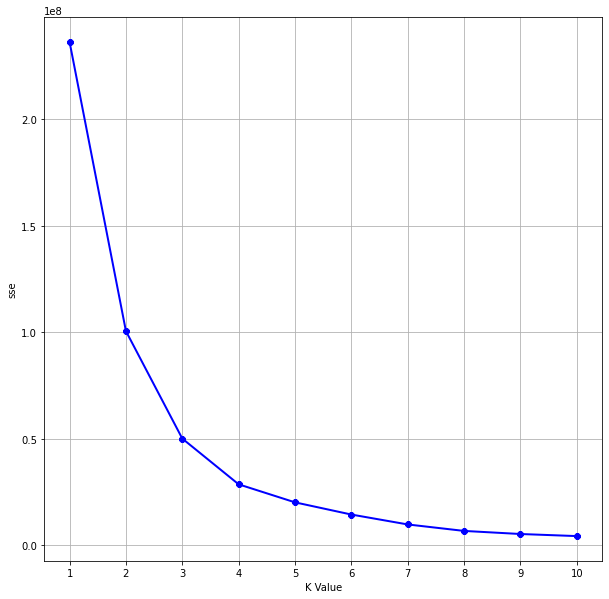

In [41]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse=[]
X = commerce_customer.iloc[:,2:].values
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(range(1,11),sse,linewidth=2,color="blue",marker="8")
plt.xlabel('K Value')
plt.xticks(np.arange(1,11,1))
plt.ylabel('sse')
plt.show()

In [30]:
kmeans.inertia_

4389088.423618463

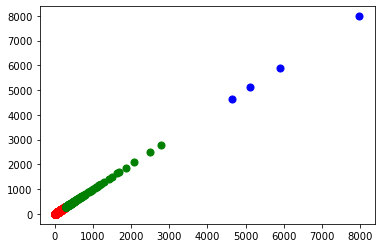

In [52]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)


plt.scatter(X[y_kmeans == 0], X[y_kmeans == 0],s = 50, c = 'red', label = 'Customer Type 1')
plt.scatter(X[y_kmeans == 1], X[y_kmeans == 1], s = 50, c = 'blue', label = 'Customer Type 2')
plt.scatter(X[y_kmeans == 2], X[y_kmeans == 2], s = 50, c = 'green', label = 'Customer Type 2')

(4372,)

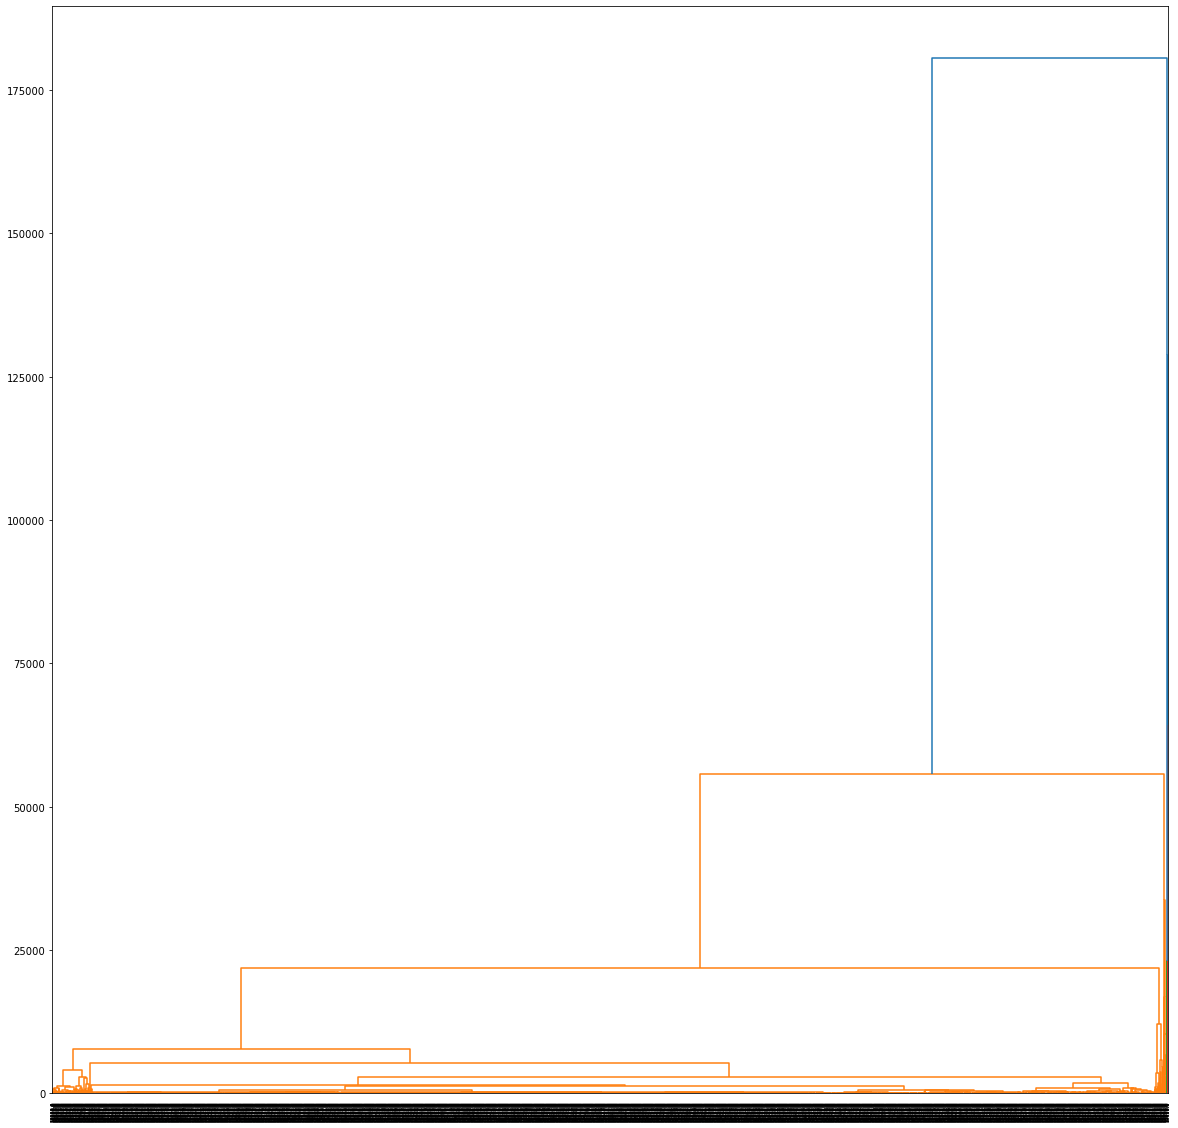

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

X = commerce_customer.drop(['CustomerID'],axis=1)
y = commerce_customer['CustomerID']

linked = linkage(X,'centroid')
plt.figure(figsize=(20,20))

dendro = dendrogram(linked, labels=list(y))
plt.xticks(rotation=90)
plt.show()


K-means clustering does a better job of finding the number of clusters. Easier to tell the number of clusters from the elbow diagram and you can use that to plot the scatter. 